<a href="https://colab.research.google.com/github/ARX662/Capstone_Projects_AlmaBetter/blob/main/M6_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CAPSTONE PROJECT FOR GLASSDOOR SALARY PREDICTION
## BY: Anurag Rath

### Business Context

In today's rapidly evolving tech industry, understanding salary trends is crucial for job seekers, employers, and policymakers. Compensation varies significantly based on job roles, company size, experience, and location, making it essential to analyze patterns that impact salary structures.

This project leverages job postings data from Glassdoor.com (2017) to predict salaries for various tech job positions. The dataset includes key features such as job title, company size, and job location, which can be used to identify salary trends, compare roles across industries, and provide valuable insights into compensation expectations.

### Dataset Description

The Glassdoor Jobs Dataset contains job postings from Glassdoor.com from 2017-2018. This dataset includes features such as job title, salary estimate, job description, rating, company name, location, headquarters, size, founded, type of ownership, industry, sector, revenue, competitors compile a list of the most important features in this dataset. , hourly wage minima and maxima,, avg_salary,, num_comp,,sdesc_len If you are looking for a job in the data science field then this is the dataset for you to explore!

### Business Objectives

For Job Seekers: Helps professionals make informed career decisions by understanding expected salary ranges for different roles.
For Employers: Assists companies in setting competitive salaries to attract and retain top talent.
For Analysts & Researchers: Provides data-driven insights into salary trends based on industry, experience, and geography.
For Recruiters: Aids in benchmarking salaries and ensuring fair compensation practices.

### Problem Statement

How does salary vary by job position (e.g., Data Scientist vs. Software Engineer vs. DevOps Engineer)?
What is the impact of company size on salary levels?
How do salaries differ by location (e.g., San Francisco vs. Austin vs. New York)?
Can we build a predictive model to estimate salaries based on job attributes?
By analyzing this dataset, we can predict salary ranges, uncover market trends, and provide insights to tech professionals and organizations.

**Git Repo LINK:** https://github.com/ARX662/Capstone_Projects_AlmaBetter/blob/main/M6_Capstone_project.ipynb

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve,average_precision_score, auc
from scipy.stats import randint as rnd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from datetime import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pickle

# Cleaning

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data read from the csv file

In [5]:
df = pd.read_csv('/content/drive/MyDrive/glassdoor_jobs.csv')

In [6]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [7]:
#Viewing the columns
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [8]:
# no duplicates in the dataset
df.duplicated().sum()

np.int64(0)

In [86]:
#----------------------- Cleaning the Salary Estimate Variable ---------------------------

# removing all the '-1' in the salary estimate

df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

df = df[df['Salary Estimate']!='-1']

Salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
minus_kd = Salary.apply(lambda x: x.replace('K','').replace('$',''))

min_hr = minus_kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))

df['min_salary'] = min_hr.apply(lambda x: int(x.split('-')[0]))

df['max_salary'] = min_hr.apply(lambda x: int(x.split('-')[1]))

df['average_salary'] = (df.min_salary + df.max_salary)/2

#---------------------------- Clearing the ratings from the Company names ---------------------

df['company_text'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3], axis = 1)

#-------------------------- Cleaning the states variable ------------------------------

df['States'] = df['Location'].apply(lambda x: x.split(',')[1])
df['States'].value_counts()

df['Same State'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis = 1)

#------------------------- Calculating the age of the company from the year founded -----------------

df['age'] = df['Founded'].apply(lambda x: x if x < 1 else 2025 - x)

#-------------------------  finding important skills for the job ---------------------------------

df['Python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

df['R_Studio'] = df['Job Description'].apply(lambda x: 1 if 'R-studio' in x.lower() or 'R studio' in x.lower() else 0)

df['Tableau'] = df['Job Description'].apply(lambda x: 1 if 'Tableau' in x.lower() else 0)

df['Spark'] = df['Job Description'].apply(lambda x: 1 if 'Spark' in x.lower() else 0)

df['Excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

#----------------------- Dropping the first column since it is of no use -------------------------

df_out = df.drop(['Unnamed: 0'], axis = 1)

df_out.to_csv('SalaryData_Cleaned.csv', index = False)


**1. Cleaning the Salary Estimate Variable**

- **Hourly/Employer Provided Distinction:**  
  The code creates two binary features:
  - **'hourly':** Set to 1 if 'per hour' appears in the salary string, capturing whether the salary is hourly.
  - **'employer_provided':** Set to 1 if the salary string specifies it's employer-provided.
  
  This distinction allows the model to treat salary estimates differently based on their structure or reporting source, improving predictive accuracy.
  
- **Removing Invalid Salaries:**  
  Rows where 'Salary Estimate' equals '-1' are dropped, eliminating missing or unusable salary data to avoid introducing bias or errors.
  
- **Extracting Salary Ranges:**  
  - Splits the salary estimate string to isolate the salary range (before any parentheses).
  - Removes 'K' and '$' symbols for numeric conversion.
  - Further removes 'per hour' and 'employer provided salary:' text to clean the string.
  - **'min_salary' and 'max_salary':** Parsed as the integer values before and after the '-' symbol.
  - **'average_salary':** Calculated as the mean of min and max, standardizing the salary target for regression.

**2. Clearing Ratings From Company Names**

- **'company_text' Generation:**  
  If the company's rating is negative, the full company name is kept. Otherwise, the last three characters (typically the rating) are stripped from the company name to clean the categorical feature and avoid redundancy with the separate 'Rating' column.

**3. Cleaning the States Variable**

- **Extracting State:**  
  Pulls the state abbreviation or name from the job location column for geographic analysis/prediction.
- **'Same State':**  
  Encodes whether the job’s location matches headquarters, capturing company spread or relocation requirements.

**4. Calculating Company Age**

- **'age' Feature:**  
  Computes founding year difference from 2020, giving the company’s age (if founded in the past). If 'Founded' is less than 1 (missing/invalid), the original value is kept.

**5. Job Skill Extraction**

- **Binary Skill Columns:**  
  Sets columns (Python, R_Studio, Tableau, Spark, Excel, AWS) to 1 if the skill or tool is mentioned in the job description.  
  This feature engineering step enables the model to understand skill demand and their impact on salary.

**6. Dropping Unnecessary Columns**

- **Drop 'Unnamed: 0':**  
  Removes extraneous index columns often present after saving/loading from CSV, streamlining the dataset.

**7. Export Cleaned Data**

- **Saving to CSV:**  
  Outputs the cleaned and engineered dataset as 'SalaryData_Cleaned.csv', ready for analysis or model training.


# EDA

In [10]:
df_cleaned =  pd.read_csv('SalaryData_Cleaned.csv')

In [11]:
df_cleaned.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_text,States,Same State,age,Python,R_Studio,Tableau,Spark,Excel,aws
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Tecolote Research\n,NM,0,47,1,0,0,0,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,KnowBe4\n,FL,1,10,1,0,0,0,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,PNNL\n,WA,1,55,1,0,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solutions\n,NY,1,22,1,0,0,0,1,0


In [12]:
#Creating a function that can atrribute to the different types of positions
def title_simple(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'NA'


# creating a function that can adjust the seniority of the positions
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'NA'



### 1. `title_simple(title)`  
**Purpose:**  
This function standardizes and simplifies job titles to core roles relevant to data-related positions.

**Logic:**  
- It checks if certain keywords (e.g., 'data scientist', 'data engineer', 'analyst', etc.) appear in the job title (case-insensitive).
- Returns a canonical job family label for each match; otherwise, assigns 'NA'.

**Reasoning:**  
Standardizing diverse job title variations into major categories helps:
- Reduce feature dimensionality,
- Minimize noise caused by title variations,
- Improve the interpretability and predictive power of job titles as a feature in salary modeling.

### 2. `seniority(title)`  
**Purpose:**  
This function assesses and classifies the seniority level of a given job title.

**Logic:**  
- Searches for senior-indicating terms (e.g., 'sr', 'senior', 'lead', 'principal') and returns 'senior'.
- If 'jr' or 'jr.' is present, returns 'jr'.
- Titles without these signals are labeled 'NA'.

**Reasoning:**  
Classifying seniority provides:
- A valuable feature for salary prediction (senior roles generally offer higher compensation),
- Consistent handling of disparate seniority indicators embedded in titles.
  
Both functions are core elements of feature engineering: they convert inconsistent textual input (job titles) into structured categorical features. This structured representation enables improved model performance and more meaningful salary analysis by capturing the essential facets of job role and experience level.
These function are further applied to their respective coloum to achieve desired results.

In [13]:
df_cleaned['job_simple'] = df_cleaned['Job Title'].apply(title_simple)

In [14]:
df_cleaned['seniority'] = df_cleaned['Job Title'].apply(seniority)

In [15]:
# Fixing los angeles into the states column
#if value in cell is not los angeles we strip of spaces else we change to CA
df_cleaned['States'] = df_cleaned['States'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [16]:
df_cleaned['States'].value_counts()

,count
States,
CA,152
MA,103
NY,72
VA,41
IL,40
MD,35
PA,33
TX,28
WA,21


In [17]:
#adding the length of JD for a addtional level of info for comparison if JD is corr with salary
df_cleaned['JDdesc_len'] = df_cleaned['Job Description'].apply(lambda x: len(x))
df_cleaned['JDdesc_len']

,JDdesc_len
0,2536
1,4783
2,3461
3,3883
4,2728
...,...
737,6162
738,6130
739,3078
740,1642


In [18]:
#---------------Cleaning the competitor variable from the dataset-----------
df_cleaned['Comp'] = df_cleaned['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [19]:
df_cleaned['Comp']

,Comp
0,0
1,0
2,0
3,3
4,3
...,...
737,3
738,3
739,0
740,0


In [20]:
#'2080' for precise annual conversion:
df_cleaned['min_salary'] = df_cleaned.apply(
    lambda x: x.min_salary * 2080 if x.hourly == 1 else x.min_salary, axis=1)
df_cleaned['max_salary'] = df_cleaned.apply(
    lambda x: x.max_salary * 2080 if x.hourly == 1 else x.max_salary, axis=1)

In [21]:
df_cleaned[df_cleaned.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,35360,49920
177,1,43680,70720
197,1,37440,52000
202,1,43680,70720
210,1,31200,52000
246,1,35360,49920
271,1,43680,70720
337,1,37440,52000
345,1,49920,81120
357,1,43680,70720


In [22]:
df_cleaned.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'States', 'Same State', 'age',
       'Python', 'R_Studio', 'Tableau', 'Spark', 'Excel', 'aws', 'job_simple',
       'seniority', 'JDdesc_len', 'Comp'],
      dtype='object')

In [23]:
df_cleaned.company_text = df_cleaned.company_text.apply(lambda x: x.replace('\n',''))

In [24]:
# Now, let us look at the data description using the describe function
df_cleaned.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,Same State,age,Python,R_Studio,Tableau,Spark,Excel,aws,JDdesc_len,Comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.0,742.0,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,1427.380054,2136.136119,100.626011,0.557951,46.591644,0.528302,0.0,0.0,0.0,0.522911,0.237197,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,7568.397050,11286.447482,38.855948,0.496965,53.778815,0.499535,0.0,0.0,0.0,0.499812,0.425651,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,54.000000,99.000000,73.500000,0.000000,11.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,72.000000,127.000000,97.500000,1.000000,24.000000,1.000000,0.0,0.0,0.0,1.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,97.000000,160.000000,122.500000,1.000000,59.000000,1.000000,0.0,0.0,0.0,1.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,56160.000000,97760.000000,254.000000,1.000000,276.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,10051.000000,4.000000


<Axes: >

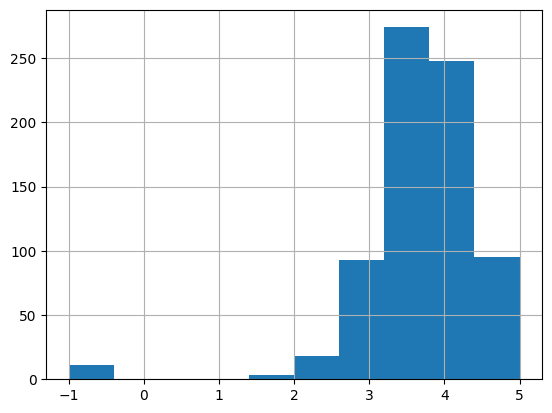

In [25]:
df_cleaned.Rating.hist()

**Chart Explanation:**  
This histogram illustrates the distribution of a quantitative variable, most likely the **company ratings** as typically found in the Glassdoor dataset.

**Key Observations:**
- **Concentration:** The vast majority of values are concentrated between **3.0 and 5.0**, with peaks near the upper end of the scale. This suggests that most companies are rated relatively favorably.
- **Outliers/Invalid Entries:** There is a noticeable small bar at **-1**, likely representing missing or flagged data for unrated companies. This aligns with Glassdoor’s convention of marking unrated/missing ratings as '-1'.
- **Distribution Gap:** There are almost no ratings between **-1** and **2**, consistent with how user-driven rating systems rarely have companies rated extremely poorly (possibly due to platform moderation or self-selection bias).

<Axes: >

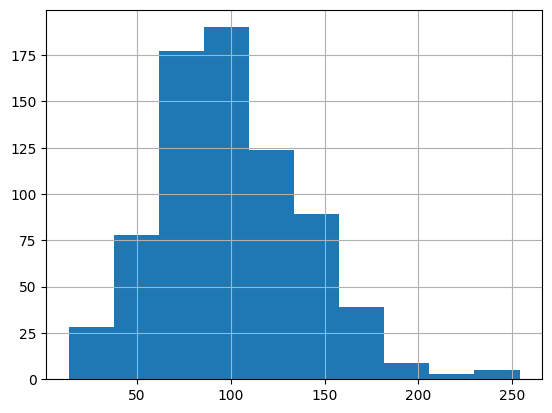

In [26]:
df_cleaned.average_salary.hist()

**Chart Explanation:**

This histogram visualizes the distribution of the **average_salary** feature from your cleaned Glassdoor dataset.

**Key Observations:**
- **Central Tendency:** The majority of salaries cluster around the **$90,000–$110,000** range, as indicated by the tallest bars.
- **Distribution Shape:** The distribution is roughly unimodal with a rightward skew; a small subset of higher salaries stretches the distribution’s tail to the right.
- **Range and Spread:** The lowest average salaries are just below **$50,000**, while the maximum extends above **$200,000**, though only a handful of jobs reach these extremes.
- **Outliers:** Very high salaries (above $180,000–$200,000) are rare and may represent senior-level or exceptional positions.

**Summary:**  
This histogram conveys that **average salary** is approximately normally distributed but slightly right-skewed in your Glassdoor dataset. Modeling this as a regression problem is appropriate.

<Axes: >

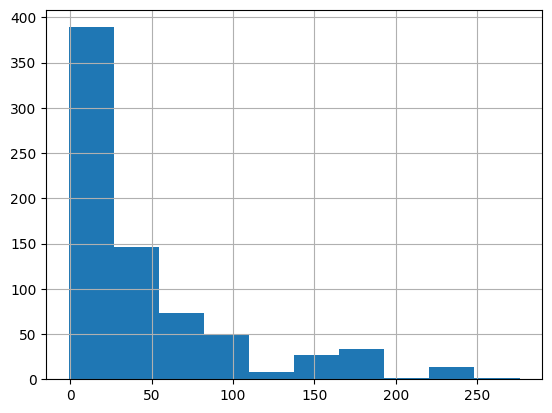

In [27]:
df_cleaned.age.hist()

The histogram in question shows a highly right-skewed distribution, with the majority of values concentrated at lower ages and a long tail extending toward higher ages. If this variable represents user age, the distribution implies most users fall within younger brackets (0–50 years), while only a small fraction are older. A gradual decline in frequency is observed as age increases, with very few users above 150 years—these could be outliers, data entry errors, or exceptional cases.

<Axes: >

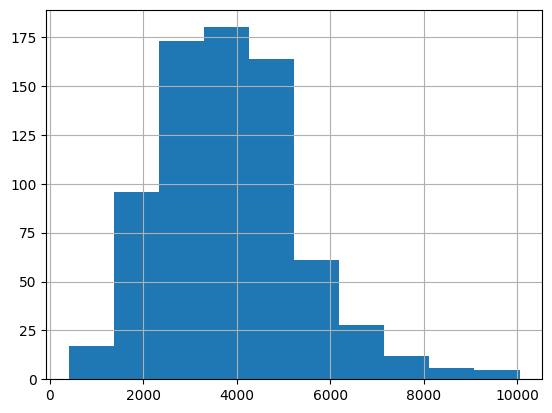

In [28]:
df_cleaned.JDdesc_len.hist()

<Axes: >

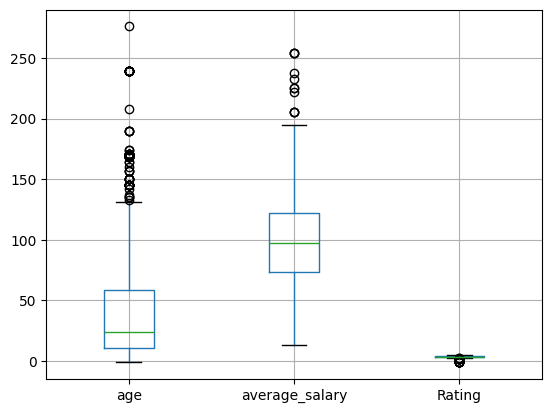

In [29]:
#Plotting boxplots on some continous variables
df_cleaned.boxplot(column = ['age','average_salary','Rating'])

### Boxplot Chart Explanation

This chart displays boxplots for three variables—**age**, **average_salary**, and **Rating**. Each boxplot summarizes the central tendency, dispersion, and outliers for its respective variable.

#### Key Observations

- **Age**
  - The distribution is highly right-skewed, with most ages concentrated in the lower range.
  - The median age is below the middle of the range, with a sizable interquartile range (IQR).
  - Numerous outliers are present above the upper whisker, indicating a small group of users or companies with much higher ages than the rest. This could reflect outlier records or data entry errors and may warrant further inspection.
- **Average Salary**
  - The salary data also shows a right skew.
  - The median is closer to the lower end, and a notable number of high-value outliers extend above the upper whisker, suggesting there are jobs or individuals with much higher salaries than the majority.
  - The IQR and whiskers illustrate a substantial spread, indicating significant variability among offered or reported salaries.
- **Rating**
  - The ratings are tightly clustered, with the box and whiskers significantly narrower than the other variables.
  - Outliers exist below and above, but the spread of typical values (within the box) is much smaller. This reflects the fact that most companies/jobs have ratings in a narrow band, while a few have unusually high or low values.

#### Summary

This boxplot analysis highlights central trends, the extent of variability, and the prevalence of outliers for each key variable. These insights support informed decisions around data cleaning, preprocessing, and modeling strategy for Glassdoor salary predictions.

In [30]:
#creating a correlation matrix
df_cleaned[['age','average_salary','Rating','JDdesc_len']].corr()

,age,average_salary,Rating,JDdesc_len
age,1.000000,0.019655,0.021655,0.163911
average_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
JDdesc_len,0.163911,0.078808,-0.012281,1.000000


<Axes: >

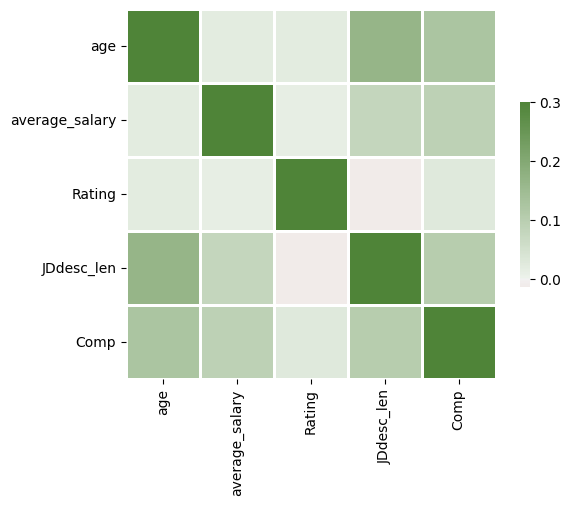

In [31]:
#Producing a heatmap so that relationship between four variables is seen
cmap = sns.diverging_palette(20, 120, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_cleaned[['age','average_salary','Rating','JDdesc_len','Comp']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5})

### Correlation Matrix Heatmap Explanation

This heatmap visualizes the correlation coefficients between key numerical features in the Glassdoor dataset: **age**, **average_salary**, **Rating**, **JDdesc_len**, and **Comp**.

#### Key Observations

- **Diagonal Dominance:** Each feature has a perfect correlation with itself along the diagonal, indicated by the darkest green squares. This is expected and serves as a reference for the scale.
- **Strength of Relationships:** Correlation values range from 0 (no correlation) to approximately 0.3 (weak positive correlation). There are no strong linear relationships (>0.5 or <-0.5) between the variables, indicating that each feature captures different aspects of the data.
- **Notable Feature Pairs:**
  - **age vs. JDdesc_len / Comp:** Slight positive correlations are observed between age and both job description length and number of competitors. This suggests that older entities may have longer job descriptions and list more competitors, though the relationship is weak.
  - **average_salary Relationships:** The average_salary feature shows low correlation with other variables, implying that salary is influenced by multiple factors not strongly captured by these individual features alone.
  - **Comp vs. age, average_salary, Rating:** The number of competitors (Comp) shows modest positive correlation with age and average_salary, suggesting older or higher-paying entities might mention more competitors.
- **Low/No Correlation:** The lightest squares (almost white) reveal near-zero correlation, indicating independence between some feature pairs. For example, Rating and JDdesc_len are nearly uncorrelated.

#### Summary

This heatmap reveals that core features like age, salary, rating, job description length, and competitors exhibit generally weak pairwise correlations. This supports their simultaneous use in multivariate modeling and motivates further exploration for more powerful predictive relationships.

In [32]:
df_cat = df_cleaned[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_text', 'States','Same State', 'Python', 'R_Studio',
       'Spark', 'aws', 'Excel','Tableau', 'job_simple', 'seniority']]

Graph for Location: total = 20


/tmp/ipython-input-33-1730259158.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_counts.index, y=cat_counts.values, palette="viridis")


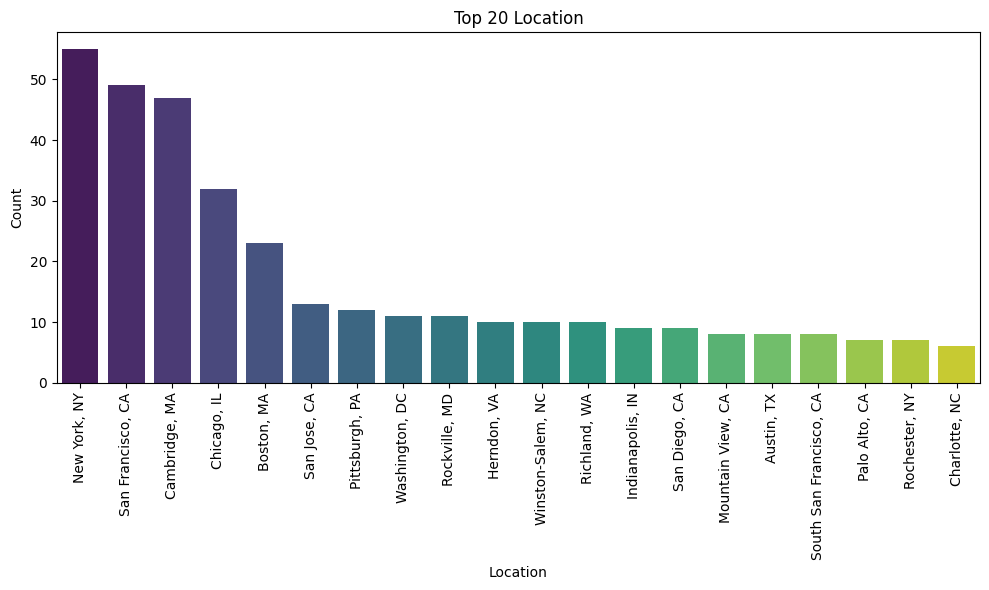

Graph for Headquarters: total = 20


/tmp/ipython-input-33-1730259158.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_counts.index, y=cat_counts.values, palette="viridis")


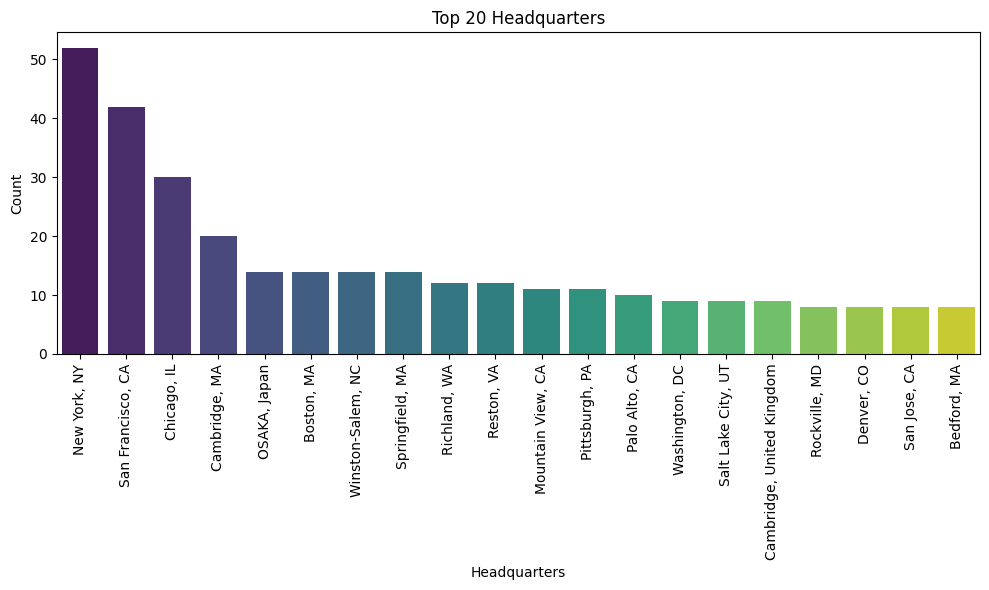

Graph for company_text: total = 20


/tmp/ipython-input-33-1730259158.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_counts.index, y=cat_counts.values, palette="viridis")


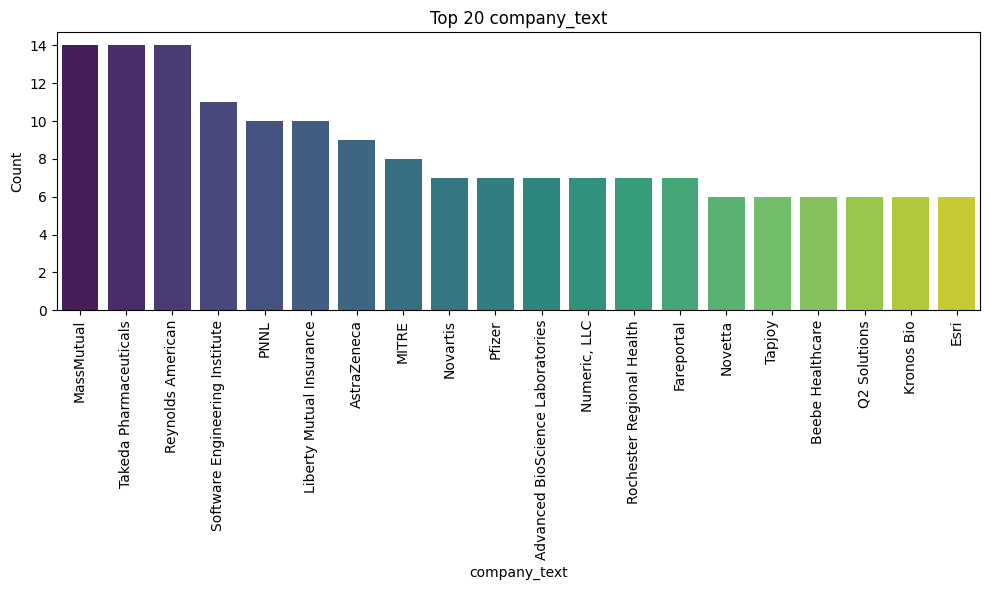

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_categories(df, cols, top_n=20, figsize=(10, 6)):
    """Plots the top N categories for each specified column in the DataFrame."""
    for col in cols:
        cat_counts = df[col].value_counts().head(top_n)
        print(f"Graph for {col}: total = {len(cat_counts)}")  # Summary output
        plt.figure(figsize=figsize)
        sns.barplot(x=cat_counts.index, y=cat_counts.values, palette="viridis")
        plt.title(f"Top {top_n} {col}")
        plt.ylabel("Count")
        plt.xlabel(col)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

plot_top_categories(df_cat, ['Location', 'Headquarters', 'company_text'], top_n=20)


### Categorical Feature Bar Plots Explanation

The provided bar charts each visualize the top 20 most frequent categories for three categorical variables from the Glassdoor dataset: **Location**, **Headquarters**, and **company_text** (company name, cleaned).

#### Top 20 Location
- The chart reveals that roles are heavily concentrated in major urban hubs such as New York, NY; San Francisco, CA; Cambridge, MA; and Chicago, IL.
- The frequency of job postings declines steeply beyond the leading cities, reflecting the dominance of industry hotspots within the dataset.
- This pattern suggests the need to treat location as a highly influential feature in salary modeling, and possibly to consolidate less frequent locations into an “Other” category to reduce sparsity.

#### Top 20 Headquarters
- Similarly, the chart for headquarters confirms that company headquarters are also clustered in large cities, with New York, NY and San Francisco, CA leading.
- There is greater diversity as the list progresses, including international (e.g., Osaka, Japan) and less populous cities.
- Recognizing headquarters concentration supports the analysis of corporate influence and regional factors on salary levels.

#### Top 20 Company Names
- This bar plot highlights that, within the dataset, firms such as MassMutual, Takeda Pharmaceuticals, and Reynolds American are among the most represented.
- The recurrence of certain company names may correspond to hiring campaigns or greater industry presence.
- High-frequency companies may disproportionately influence overall salary patterns, warranting adjustments for company-specific effects in modeling.

These visualizations are central to understanding categorical feature distributions, identifying industry or location concentration effects, and informing robust feature engineering in the salary prediction workflow.

In [34]:
# Average salary per job role
pd.pivot_table(df_cleaned, index = 'job_simple', values = 'average_salary')

,average_salary
job_simple,
NA,84.853261
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning,126.431818
manager,84.022727


In [35]:
# same as above grouped by role and indexed on seniority
pd.pivot_table(df_cleaned, index = ['job_simple','seniority'], values = 'average_salary')

average_salary
job_simple       seniority                
NA               NA              73.988189
                 senior         109.061404
analyst          NA              61.155405
                 jr              56.500000
                 senior          79.092593
data engineer    NA              96.701220
                 senior         124.689189
data scientist   NA             107.043011
                 jr             106.500000
                 senior         138.956522
director         NA             168.607143
machine learning NA             119.133333
                 senior         142.071429
manager          NA              84.022727

In [36]:
# Average salalry per state sorted in descending order
pd.pivot_table(df_cleaned, index = 'States', values = 'average_salary').sort_values('average_salary', ascending = False)

,average_salary
States,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [37]:
pd.set_option('display.max_rows',None)

In [38]:
# Count of Jobs per state
pd.pivot_table(df_cleaned, index = ['States','job_simple'], values = 'average_salary', aggfunc = 'count').sort_values('States', ascending = False)

average_salary
States job_simple                      
WI     data scientist                 3
       analyst                        3
       NA                             4
WA     data scientist                17
       analyst                        3
       NA                             1
VA     machine learning               2
       data scientist                18
       data engineer                 10
       analyst                        6
       NA                             5
UT     data engineer                  3
       analyst                        4
       data scientist                 3
TX     data scientist                13
       data engineer                  8
       NA                             7
TN     data scientist                 1
       data engineer                 10
       analyst                        2
SC     NA                             1
RI     analyst                        1
PA     data scientist                 6
       analyst                        8
       data engineer                  1
       NA                             8
       machine learning               7
       manager                        3
OR     data scientist                 3
       data engineer                  1
OH     data scientist                 7
       analyst                        4
       NA                             3
NY     machine learning               2
       data scientist                40
       data engineer                  4
       analyst                       14
       NA                            12
NM     data scientist                 3
NJ     data engineer                  2
       NA                             1
       analyst                        6
       director                       2
       data scientist                 4
       manager                        2
NE     NA                             4
NC     data scientist                 3
       data engineer                  6
       NA                            12
MO     manager                        1
       data scientist                 3
       analyst                        2
       NA                             3
MN     data engineer                  1
       analyst                        1
MI     manager                        2
       data scientist                 4
MD     data scientist                13
       data engineer                  3
       analyst                        3
       NA                            16
MA     manager                        5
       director                       6
       data scientist                30
       data engineer                 12
       analyst                        4
       NA                            46
LA     NA                             1
       analyst                        1
       data engineer                  2
KY     data scientist                 2
       NA                             4
KS     machine learning               3
IN     data scientist                 2
       data engineer                  4
       NA                             4
IL     NA                             6
       machine learning               2
       director                       6
       data scientist                15
       data engineer                  8
       analyst                        3
ID     analyst                        2
IA     analyst                        2
       data engineer                  3
GA     NA                             3
       data scientist                 3
FL     data scientist                 7
       data engineer                  3
       analyst                        6
DE     NA                             6
DC     data scientist                 5
       data engineer                  4
       analyst                        2
CT     data scientist                 2
       NA                             3
CO     data scientist                 3
       analyst                        1
       NA                

In [39]:
df_cleaned['average_salary']

,average_salary
0,72.0
1,87.5
2,85.0
3,76.5
4,114.5
5,95.0
6,73.5
7,114.0
8,61.0
9,140.0


In [40]:
df_pivots = df_cleaned[['Rating', 'Industry', 'Sector', 'Revenue', 'Comp', 'hourly', 'employer_provided', 'Python', 'R_Studio', 'Spark', 'aws','Tableau', 'Excel', 'Type of ownership','average_salary']].reset_index()


In [41]:
# finding average per coloumn seelcted in df_pivoted
columns_to_pivot_by = [col for col in df_pivots.columns if col not in ['average_salary', 'index']]

for i in columns_to_pivot_by:
    print(f"\n--- Pivoting by: {i} ---")
    try:
        # Default aggregation is 'mean', which is usually good for average salary
        pivot_result = pd.pivot_table(df_pivots, index=i, values='average_salary')
        print(pivot_result.sort_values('average_salary', ascending=False))
    except Exception as e:
        print(f"Error pivoting on column '{i}': {e}")


--- Pivoting by: Rating ---
        average_salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286

--- Pivoting by: Industry ---
                                          average_salary
Industry                                                
Other Retail Stores                           163.500000
Motion Pic

In [42]:
# Create a pivot table to count the number of job postings (with a recorded average salary)
# for each revenue category and presence of Python skill requirement.
# 'Revenue' is set as the row index, 'Python' (0: not required, 1: required) as columns,
# and values are counts of entries in 'average_salary' for each (Revenue, Python) pairing.

pd.pivot_table(df_pivots, index = 'Revenue', columns = 'Python', values = 'average_salary', aggfunc = 'count')

Python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [43]:
df_cleaned.to_csv('EDA-Salary Data.csv', index = False)

# Model Building

In [44]:
model_df = pd.read_csv('EDA-Salary Data.csv')

In [45]:
#Selecting the relevant models
model = model_df[['average_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','Comp','hourly','employer_provided',
               'States','Same State','age','Python','Spark','aws','Excel','Tableau','job_simple','seniority','JDdesc_len']]

In [46]:
#Creating dummy variables and converting categorical columns into numerical columns
df_dummy = pd.get_dummies(model)
X = df_dummy.drop('average_salary', axis=1)
Y = df_dummy['average_salary'].values

X = df_dummy.drop('average_salary', axis=1)
Y = df_dummy['average_salary'].values

In [47]:

#Let's split the data into 80% training and 20% testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
# Linear Regression Model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [61]:
#MAE
print(mean_absolute_error(Y_test,lm.predict(X_test)))

18.594255540944612


In [59]:
# Random Forest Regressor MAE
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
print(mean_absolute_error(Y_test,rf.predict(X_test)))

11.559026845637584


In [60]:
# Support vector Machine Regressor MAE
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train,Y_train)
print(mean_absolute_error(Y_test,svr.predict(X_test)))

31.758395837035078


In [62]:
# Grid search CV for best estimator
parameters = {
    'n_estimators': range(10, 300, 10),
    'criterion': ['squared_error', 'absolute_error'],   # Updated criteria names
    'max_features': ['sqrt', 'log2']   # 'auto' deprecated, use 'sqrt'
}

rf = RandomForestRegressor()

gs = GridSearchCV(
    estimator=rf,
    param_grid=parameters,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

gs.fit(X_train, Y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [63]:
gs.best_score_

np.float64(-15.492324717959235)

In [64]:
gs.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=130)

Using grid search best estimators for the model has been calculated
which is then put to test and check for improvements

In [65]:
# testing ensembles models and the new regression model with best params
model_pred_lm = lm.predict(X_test)
model_pred_rf = gs.predict(X_test)
model_pred_svr = svr.predict(X_test)

In [66]:
mean_absolute_error(Y_test,model_pred_rf)

12.692281879194635

In [67]:
mean_absolute_error(Y_test,model_pred_svr)

31.758395837035078

In [68]:
mean_absolute_error(Y_test,model_pred_lm)

18.594255540944612

In [76]:
model = gs # your model object
data = {'model': model}
with open("model_file.p", "wb") as f:
    pickle.dump(data, f)

In [77]:

# Load the model
with open("model_file.p", "rb") as pickled:
    data = pickle.load(pickled)
    model = data['model']


In [79]:
# Make predictions on the entire test set using the loaded model
Y_pred = model.predict(X_test)

In [85]:
#check the loaded model for metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


MAE: 12.692281879194635
MSE: 384.55326108971053
R-squared: 0.764728891002995
